## This script contains the following points:
1. Import libraries
2. Loading and checking data
3. Clean the data
4. Exploratory data analysis
5. State hypothesis
6. Reshape variales into NumPy arrays
7. Split the data into training and test sets
8. Run a linear regression on the data
9. Visualize the results
10. Interpretation of the results
11. Check model performance statistics
12. Compare the predicted y values with the actual y values in a dataframe
13. Thoughts on how well the model performed
14. Additional analysis - Top 5 conditions
15. Final interpretation of the results

In [3]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [5]:
# Creating a folder path
path = r'C:\Users\Lenovo\Desktop\Career Foundry\Achievement 6'

In [7]:
#Using the os.path.function to import the cleaned file
df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'Covid_clean_new2.csv'), index_col = False)

In [9]:
df.shape

(475065, 8)

In [11]:
# No one will understand scientific numbers. Changing the display setting:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [13]:
df.describe()

,Year,Month,COVID-19 Deaths,Number of Mentions
count,475065.00,475065.00,475065.00,475065.00
mean,2021.40,6.20,9.47,10.25
std,1.08,3.35,49.84,52.89
min,2020.00,1.00,0.00,0.00
25%,2020.00,3.00,0.00,0.00
50%,2021.00,6.00,0.00,0.00
75%,2022.00,9.00,6.00,6.00
max,2023.00,12.00,5094.00,5094.00


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 475065 entries, 0 to 475064
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Year                475065 non-null  float64
 1   Month               475065 non-null  float64
 2   State               475065 non-null  object 
 3   Condition Group     475065 non-null  object 
 4   Condition           475065 non-null  object 
 5   Age Group           475065 non-null  object 
 6   COVID-19 Deaths     475065 non-null  float64
 7   Number of Mentions  475065 non-null  float64
dtypes: float64(4), object(4)
memory usage: 29.0+ MB


In [19]:
# Select only the numeric columns
df_numeric = df[['Number of Mentions', 'COVID-19 Deaths']]

In [23]:
df_numeric.shape

(475065, 2)

### Visually Exploring Data

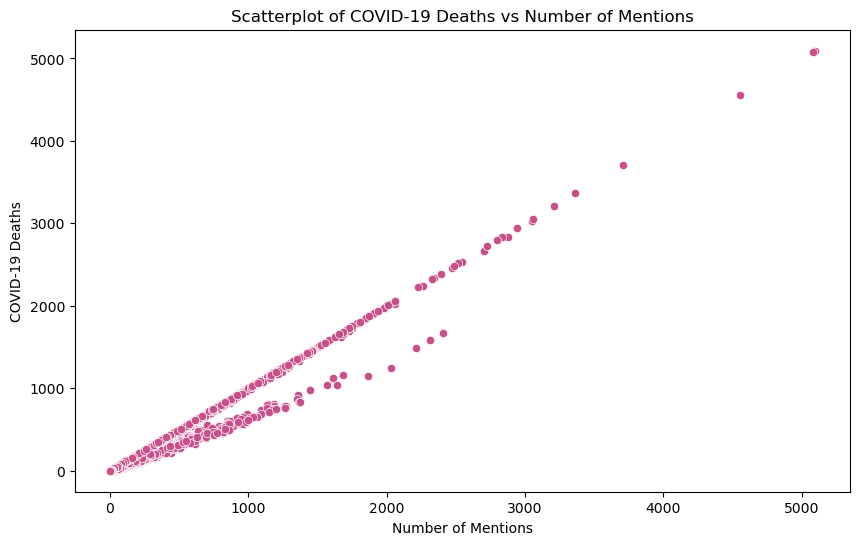

In [25]:
# Scatterplot visulize the realtionship between Number of Mentions and COVID-19 Deaths
plt.figure(figsize=(10,6))
sns.scatterplot(data = df_numeric, x = 'Number of Mentions', y = 'COVID-19 Deaths' , color = '#c94f8a')
plt.title('Scatterplot of COVID-19 Deaths vs Number of Mentions')
plt.xlabel('Number of Mentions')
plt.ylabel('COVID-19 Deaths')
plt.show()

## Hypothesis: If the number of mentions of a condition on death certificates is higher, then the COVID-19 death count will be significantly higher.

### Reshape Variables into NumPy Arrays
X = The independent variable
Y = The dependent variabble)

#### "Number of Mentions" is the predictor (independent variable) and
#### "COVID-19" is the response (dependent variable)

In [33]:
# Define the in dependent variable(x) and deppendent variable(y)
X = df_numeric['Number of Mentions'].values.reshape(-1, 1)
y = df_numeric['COVID-19 Deaths'].values

### Split the Data into Training and Test Sets

In [36]:
# 70% training sets and 30% test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=18)

In [38]:
# verify the shape of the training sets and test sets
print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (332545, 1)
X_test shape: (142520, 1)
y_train shape: (332545,)
y_test shape: (142520,)


### Run a Linear Regression on the Data

#### Training Set

In [42]:
# Initialize the linear regression model
regression = LinearRegression()

In [44]:
# Fit the model to the training data
regression.fit(X_train, y_train)

LinearRegression()

In [46]:
# Predict on the test data
y_pred = regression.predict(X_test)

### Visualizations (Scatterplot)

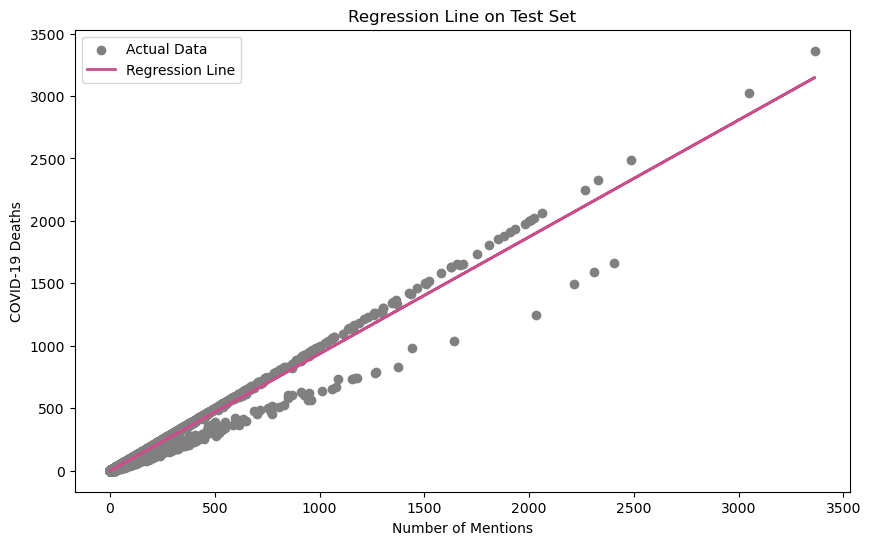

In [49]:
# Plot actual vs predicted values to visualize model performance
plt.figure(figsize=(10,6))
plt.scatter(X_test, y_test, color = 'grey', label = 'Actual Data')
plt.plot(X_test, y_pred, color = '#c94f8a', linewidth = 2, label = 'Regression Line')
plt.title('Regression Line on Test Set')
plt.xlabel('Number of Mentions')
plt.ylabel('COVID-19 Deaths')
plt.legend()

# Export to the 'Visualizations' folder
file_name = os.path.join(path, '04 Analysis', 'Visualizations', 'regression_line_test_set.png')
plt.savefig(file_name)
plt.show()

#### Interpretation of the Results

##### The scatterplot and regression line visulaization show a clear positive relationship between the "Number of Mentions" of a condition on death certificates and "COVID-19 Deaths".

##### The regression line closely follows the data points, indicating a strong fit.

#### Check Model Performance Statistics

In [55]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R2 Score: {r2}')

Mean Squared Error: 64.46236939820959
R2 Score: 0.9739034750180038


#### MSE of 64.46 in a dataset 142520 rows is very close
#### As we can see the R2 Score of 97.39 % suggests a very strong relationship

In [58]:
# Create a dataframe to compare actual and predicted values
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicated': y_pred})

In [62]:
# Check the results
comparison_df.head(10)

,Actual,Predicated
0,0.00,-0.12
1,0.00,-0.12
2,86.00,111.25
3,0.00,-0.12
4,0.00,-0.12
5,0.00,0.81
6,0.00,-0.12
7,6.00,4.56
8,2.00,5.49
9,8.00,0.81


In [64]:
comparison_df.shape

(142520, 2)

### Additional Analysis - Top 5 Conditions

#### Performing additional linear regression analyses focused on the top 5 conditions identified in the previous exercises:l failure

##### Influenza and pneumonia

##### Vascular and unspecified dementia

##### Ischemic heart disease

##### Diabetes

##### Renal failure

In [69]:
# Filter the dataset to include only the selected conditions
top_conditions = ['Influenza and pneumonia', 'Vascular and unspecified dementia', 'Ischemic heart disease', 'Diabetes', 'Renal failure']
df_top_conditions = df[df['Condition'].isin(top_conditions)]

In [71]:
# Check the results of filtering
unique_conditions = df_top_conditions['Condition'].unique()
unique_conditions

array(['Influenza and pneumonia', 'Ischemic heart disease', 'Diabetes',
       'Vascular and unspecified dementia', 'Renal failure'], dtype=object)

Influenza and pneumonia - Mean Squared Error: 7.245809775180303
Influenza and pneumonia - R2 Score: 0.9990814162314329


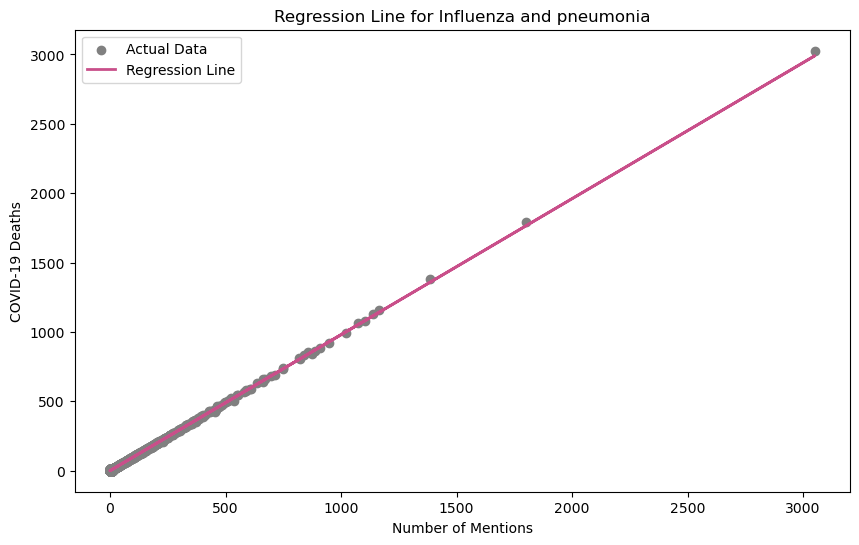

Vascular and unspecified dementia - Mean Squared Error: 3.1485986042864176
Vascular and unspecified dementia - R2 Score: 0.9936486098873571


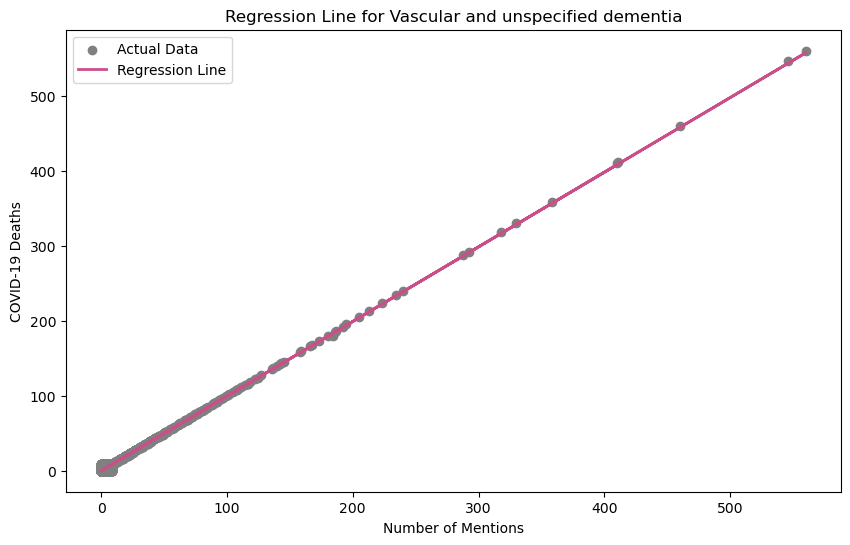

Ischemic heart disease - Mean Squared Error: 5.226612361017378
Ischemic heart disease - R2 Score: 0.988162438091843


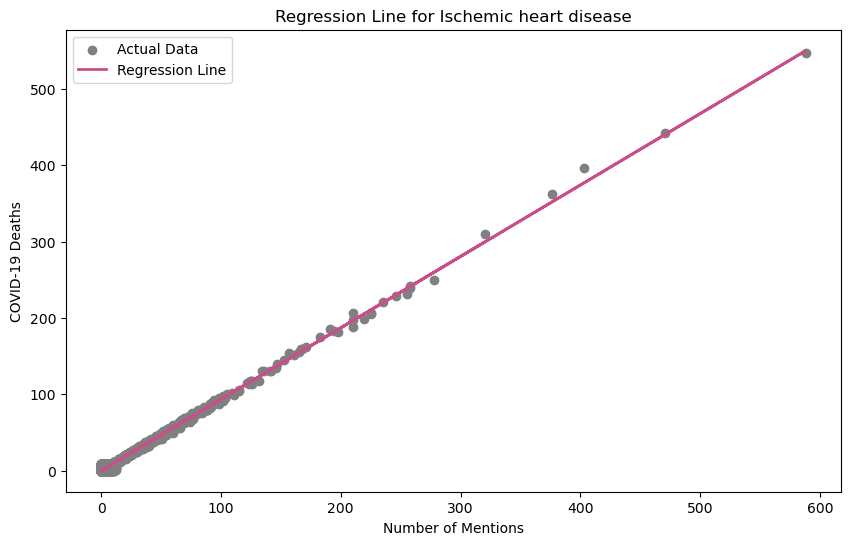

Diabetes - Mean Squared Error: 5.547819877544573
Diabetes - R2 Score: 0.9932475104055519


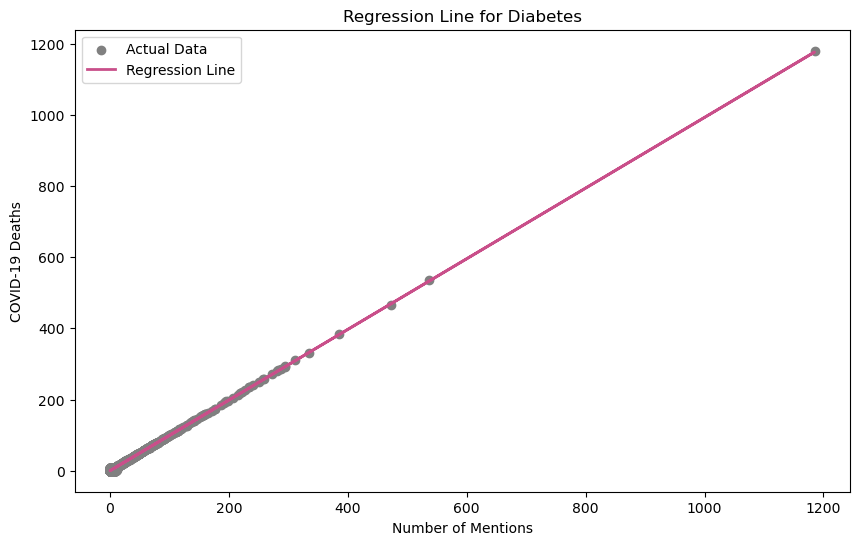

Renal failure - Mean Squared Error: 5.606440310336946
Renal failure - R2 Score: 0.9861995201766934


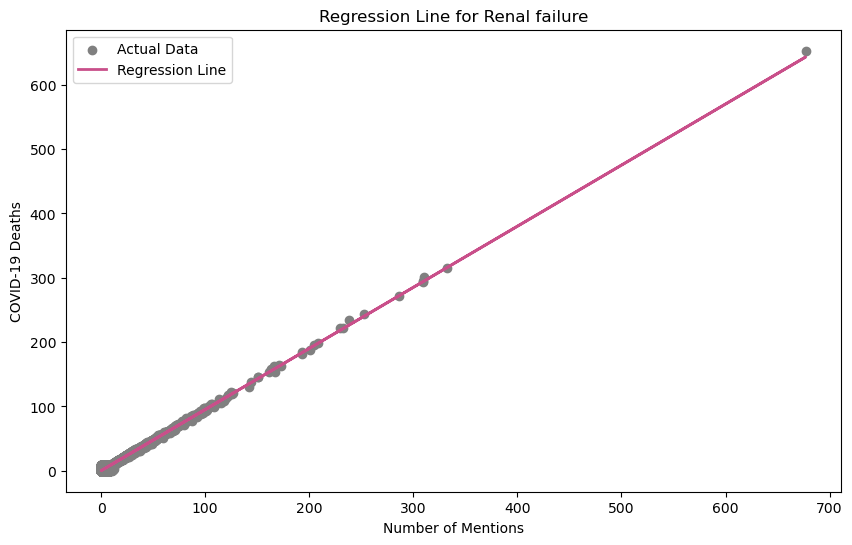

In [73]:
# Run the regression analysis for each of the specified conditons using a for loop
for condition in top_conditions:
    df_condition = df_top_conditions[df_top_conditions['Condition'] == condition]
    
    # Define the independent variable (x) and the dependent variable (y)
    X_condition = df_condition['Number of Mentions'].values.reshape(-1, 1)
    y_condition = df_condition['COVID-19 Deaths'].values
    
    # Split the data 70% training sets and 30% test sets
    X_train_cond, X_test_cond, y_train_cond, y_test_cond = train_test_split(X_condition, y_condition, test_size=0.3, random_state=18)
    
    # Initialize the linear regression model
    regression_cond = LinearRegression()
    
    # Fit the model to the training data
    regression_cond.fit(X_train_cond, y_train_cond)
    
    # Predict on the test data
    y_pred_cond = regression_cond.predict(X_test_cond)
    
    # Visualize the results
    plt.figure(figsize=(10, 6))
    plt.scatter(X_test_cond, y_test_cond, color='grey', label='Actual Data')
    plt.plot(X_test_cond, y_pred_cond, color='#c94f8a', linewidth=2, label='Regression Line')
    plt.title(f'Regression Line for {condition}')
    plt.xlabel('Number of Mentions')
    plt.ylabel('COVID-19 Deaths')
    plt.legend()
    
    # Check the performance statistics
    mse_cond = mean_squared_error(y_test_cond, y_pred_cond)
    r2_cond = r2_score(y_test_cond, y_pred_cond)
    print(f'{condition} - Mean Squared Error: {mse_cond}')
    print(f'{condition} - R2 Score: {r2_cond}')
    
    # Export the plots to the "Visualizations" folder
    file_name = os.path.join(path, '04 Analysis', 'Visualizations', f'regression_line_{condition.replace(" ", "_").lower()}.png')
    plt.savefig(file_name)
    plt.show()

### The additional analysis focused on the top 5 conditions provides further insights into the relationship between specific conditions and COVID-19 Deaths:

#### Influenza and pneumonia: MSE = 7.25, R2 = 0.999
#### Vascular and unspecified dementia: MSE = 3.15, R2 = 0.993
#### Ischemic heart disease: MSE = 5.22, R2 = 0.998
#### Diabetes: MSE = 5.55, R2 = 0.993
#### Renal failure: MSE = 5.60, R2 = 0.986


### The results show that the model performs exceptionally well across these specific conditions, with lower MSEs and higher R-squared values than the model of all conditions.
### These results reinforce the conslusion that the "Number of Mentions" of these specific conditions is a very strong predictor of "COVID-19 Deaths".
